## Importing Modules

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

## Import CMS Benefits_Cost_Sharing_2023

In [15]:
cms_data_1 = pd.read_csv(r'\Users\burke\Downloads/Benefits_Cost_Sharing_PUF.csv', low_memory=False)

In [18]:
print(cms_data_1.head())

   BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2023        AK     21989       HIOS  2022-11-19 01:01:13   
1          2023        AK     21989       HIOS  2022-11-19 01:01:13   
2          2023        AK     21989       HIOS  2022-11-19 01:01:13   
3          2023        AK     21989       HIOS  2022-11-19 01:01:13   
4          2023        AK     21989       HIOS  2022-11-19 01:01:13   

  StandardComponentId             PlanId                      BenefitName  \
0      21989AK0030001  21989AK0030001-00  Routine Dental Services (Adult)   
1      21989AK0030001  21989AK0030001-00     Dental Check-Up for Children   
2      21989AK0030001  21989AK0030001-00        Basic Dental Care - Child   
3      21989AK0030001  21989AK0030001-00              Orthodontia - Child   
4      21989AK0030001  21989AK0030001-00        Major Dental Care - Child   

    CopayInnTier1 CopayInnTier2  ... IsEHB IsCovered QuantLimitOnSvc LimitQty  \
0  Not Applicable           N

In [19]:
print(cms_data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219663 entries, 0 to 2219662
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BusinessYear         int64  
 1   StateCode            object 
 2   IssuerId             int64  
 3   SourceName           object 
 4   ImportDate           object 
 5   StandardComponentId  object 
 6   PlanId               object 
 7   BenefitName          object 
 8   CopayInnTier1        object 
 9   CopayInnTier2        object 
 10  CopayOutofNet        object 
 11  CoinsInnTier1        object 
 12  CoinsInnTier2        object 
 13  CoinsOutofNet        object 
 14  IsEHB                object 
 15  IsCovered            object 
 16  QuantLimitOnSvc      object 
 17  LimitQty             float64
 18  LimitUnit            object 
 19  Exclusions           object 
 20  Explanation          object 
 21  EHBVarReason         object 
 22  IsExclFromInnMOOP    object 
 23  IsExclFromOonMOOP    object 
dty

In [20]:
cms_data_1.duplicated().sum()

0

In [21]:
cms_data_1.isnull().sum()

BusinessYear                 0
StateCode                    0
IssuerId                     0
SourceName                   0
ImportDate                   0
StandardComponentId          0
PlanId                       0
BenefitName                  0
CopayInnTier1           503349
CopayInnTier2          1852011
CopayOutofNet           503349
CoinsInnTier1           503349
CoinsInnTier2          1852011
CoinsOutofNet           503349
IsEHB                   578607
IsCovered               126678
QuantLimitOnSvc        1612945
LimitQty               1924276
LimitUnit              1924243
Exclusions             2082783
Explanation            1536817
EHBVarReason           1674567
IsExclFromInnMOOP       390070
IsExclFromOonMOOP       389650
dtype: int64

## Number of Plans by State

In [10]:
State_Plans = cms_data_1.groupby('StateCode')['PlanId'].count()

In [36]:
State_Plans.head()

StateCode
AK     4889
AL    17699
AR    24231
AZ    94694
DE    10499
Name: PlanId, dtype: int64

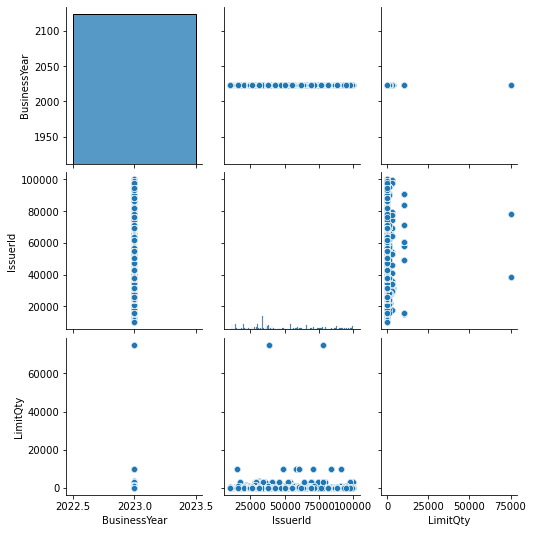

In [7]:
sns.pairplot(cms_data_1)

In [8]:
plt.show()

In [11]:
state_plans_count = State_Plans.sort_index()

In [12]:
print(state_plans_count)

StateCode
AK      4889
AL     17699
AR     24231
AZ     94694
DE     10499
FL    192265
GA    120360
HI      6450
IA     22778
IL    134525
IN     33534
KS     44864
LA     50093
MI     83471
MO     72841
MS     28004
MT     34473
NC    125053
ND     19794
NE     57427
NH     31185
OH    123680
OK     65272
OR     27975
SC     34532
SD     21324
TN    104628
TX    334446
UT     35324
VA     52481
WI    192362
WV      9114
WY      9396
Name: PlanId, dtype: int64


<AxesSubplot:xlabel='StateCode'>

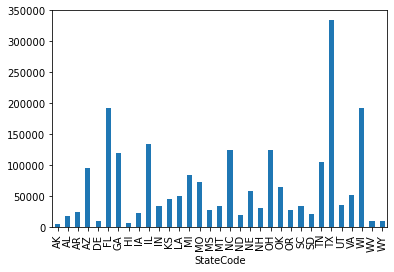

In [13]:
state_plans_count.plot(kind = 'bar')

NameError: name 'x_labels' is not defined

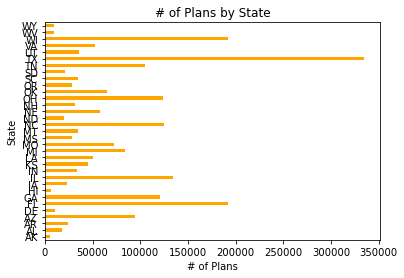

In [35]:
ax = state_plans_count.plot(kind = 'barh', color = 'orange')
ax.set_title("# of Plans by State")
ax.set_xlabel("# of Plans")
ax.set_ylabel("State")
ax.set_xticklabels(x_labels)

In [14]:
state_plans_count.sum()

2219663

In [27]:
state_plans_count.max()

334446

In [28]:
state_plans_count.min()

4889

# Import Rates PUF

In [36]:
cms_rate_data = pd.read_csv(r'\Users\burke\Downloads/Rate_PUF.csv', low_memory=False)

In [37]:
print(cms_rate_data.head())

   BusinessYear StateCode  IssuerId SourceName           ImportDate  \
0          2023        AK     21989       HIOS  2022-11-19 01:01:13   
1          2023        AK     21989       HIOS  2022-11-19 01:01:13   
2          2023        AK     21989       HIOS  2022-11-19 01:01:13   
3          2023        AK     21989       HIOS  2022-11-19 01:01:13   
4          2023        AK     21989       HIOS  2022-11-19 01:01:13   

  RateEffectiveDate RateExpirationDate          PlanId   RatingAreaId Tobacco  \
0        2023-10-01         2023-12-31  21989AK0110001  Rating Area 1     NaN   
1        2023-01-01         2023-03-31  21989AK0110001  Rating Area 1     NaN   
2        2023-04-01         2023-06-30  21989AK0110001  Rating Area 1     NaN   
3        2023-07-01         2023-09-30  21989AK0110001  Rating Area 1     NaN   
4        2023-07-01         2023-09-30  21989AK0110001  Rating Area 2     NaN   

             Age  IndividualRate  IndividualTobaccoRate  Couple  \
0  Family Option   

In [39]:
print(cms_rate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752441 entries, 0 to 2752440
Data columns (total 20 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   ImportDate                                 object 
 5   RateEffectiveDate                          object 
 6   RateExpirationDate                         object 
 7   PlanId                                     object 
 8   RatingAreaId                               object 
 9   Tobacco                                    object 
 10  Age                                        object 
 11  IndividualRate                             float64
 12  IndividualTobaccoRate                      float64
 13  Couple                                    

In [40]:
cms_rate_data.duplicated().sum()

0

In [41]:
cms_rate_data.isnull().sum()

BusinessYear                                       0
StateCode                                          0
IssuerId                                           0
SourceName                                         0
ImportDate                                         0
RateEffectiveDate                                  0
RateExpirationDate                                 0
PlanId                                             0
RatingAreaId                                       0
Tobacco                                          991
Age                                                0
IndividualRate                                     0
IndividualTobaccoRate                        1317760
Couple                                       2751450
PrimarySubscriberAndOneDependent             2751450
PrimarySubscriberAndTwoDependents            2751450
PrimarySubscriberAndThreeOrMoreDependents    2751450
CoupleAndOneDependent                        2751450
CoupleAndTwoDependents                       2

In [59]:
cms_rate_data_list = cms_rate_data['StateCode'].tolist()

In [64]:
cms_rate_data_condensed = cms_rate_data.drop(['BusinessYear', 'IssuerId', 'SourceName', 'ImportDate', 'RateEffectiveDate', 'RateExpirationDate', 'RatingAreaId'], axis = 1)

In [67]:
print(cms_rate_data_condensed.head())

  StateCode          PlanId Tobacco            Age  IndividualRate  \
0        AK  21989AK0110001     NaN  Family Option           76.59   
1        AK  21989AK0110001     NaN  Family Option           73.82   
2        AK  21989AK0110001     NaN  Family Option           74.74   
3        AK  21989AK0110001     NaN  Family Option           75.66   
4        AK  21989AK0110001     NaN  Family Option           71.88   

   IndividualTobaccoRate  Couple  PrimarySubscriberAndOneDependent  \
0                    NaN  159.30                            183.81   
1                    NaN  153.54                            177.16   
2                    NaN  155.46                            179.38   
3                    NaN  157.38                            181.59   
4                    NaN  149.51                            172.51   

   PrimarySubscriberAndTwoDependents  \
0                             183.81   
1                             177.16   
2                             179.38  

In [68]:
cms_rate_data_condensed.groupby(['StateCode', 'Tobacco', 'Age']).agg(['mean','median', 'min', 'max'])

IndividualRate            \
                                                              mean    median   
StateCode Tobacco                       Age                                    
AK        No Preference                 0-14            204.175349    63.000   
                                        15              220.405581    63.000   
                                        16              226.475349    63.000   
                                        17              232.568372    63.000   
                                        18              239.033488    63.000   
...                                                            ...       ...   
WY        Tobacco User/Non-Tobacco User 60             1636.230556  1634.080   
                                        61             1694.108148  1691.880   
                                        62             1732.089444  1729.815   
                                        63             1779.717222  1777.380   
                                        64 and over    1808.645741  1806.270   

                                                                       \
                                                         min      max   
StateCode Tobacco                       Age                             
AK        No Preference                 0-14           35.75   466.00   
                                        15             36.82   507.00   
                                        16             36.82   523.00   
                                        17             36.82   539.00   
                                        18             36.82   556.00   
...                                                      ...      ...   
WY        Tobacco User/Non-Tobacco User 60           1244.47  1969.34   
                                        61           1288.49  2039.00   
                                        62           1317.37  2084.71   
                                        63           1353.60  2142.04   
                                        64 and over  1375.60  2176.86   

                                                    IndividualTobaccoRate  \
                                                                     mean   
StateCode Tobacco                       Age                                 
AK        No Preference                 0-14                          NaN   
                                        15                            NaN   
                                        16                            NaN   
                                        17                            NaN   
                                        18                            NaN   
...                                                                   ...   
WY        Tobacco User/Non-Tobacco User 60                    2045.287963   
                                        61                    2117.633333   
                                        62                    2165.110556   
                                        63                    2224.645556   
                                        64 and over           2260.807778   

                                                                        \
                                                       median      min   
StateCode Tobacco                       Age                              
AK        No Preference                 0-14              NaN      NaN   
                                        15                NaN      NaN   
                                        16                NaN      NaN   
                                        17                NaN      NaN   
                                        18                NaN      NaN   
...                                                       ...      ...   
WY        Tobacco User/Non-Tobacco User 60           2042.600  1555.58   
                                        61           2114.855  1610.61   
               

In [79]:
cms_rate_data_individual = cms_rate_data_condensed[['StateCode', 'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate']]

In [80]:
print(cms_rate_data_individual.head())

  StateCode Tobacco            Age  IndividualRate  IndividualTobaccoRate
0        AK     NaN  Family Option           76.59                    NaN
1        AK     NaN  Family Option           73.82                    NaN
2        AK     NaN  Family Option           74.74                    NaN
3        AK     NaN  Family Option           75.66                    NaN
4        AK     NaN  Family Option           71.88                    NaN


In [72]:
median_income = requests.get('https://worldpopulationreview.com/state-rankings/median-household-income-by-state')
type(median_income)

requests.models.Response

In [73]:
requests.get('https://worldpopulationreview.com/state-rankings/median-household-income-by-state')

<Response [200]>

In [74]:
median_income.status_code

200

In [75]:
median_income.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [76]:
median_income_data = pd.read_csv(r'\Users\burke\Downloads/median-household-income-by-state-[updated-august-2023].csv', low_memory=False)

In [77]:
print(median_income_data.head())

                  state  medianHouseholdIncome2021
0              Maryland                      90203
1  District of Columbia                      90088
2         Massachusetts                      89645
3            New Jersey                      89296
4         New Hampshire                      88465
